# Table of Contents
* [Load data](#load_data)
* [Analysis](#analysis)

In [1]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## <a id='load_data'></a>
# 1. Load data

In [2]:
training_df = pd.read_csv("training_set_features.csv")
output_df = pd.read_csv("training_set_labels.csv")
training_df = training_df.merge(output_df, how='inner', on="id")

### <a name="analysis"></a>
# 2. Analysis

## 2.1 Dataset Overview

### 2.11 Example dataset

In [3]:
training_df.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


# 2.12 Dataset columns information

In [4]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

# 2.13 Dataset duplicated data

In [5]:
training_df[training_df.duplicated(keep=False)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


# 2.14 Dataset missing values

In [6]:
training_df.isnull().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
payment                      0
waterpoint_type_group        0
extraction_type_group        0
extraction_type_class        0
waterpoint_type              0
management                   0
management_group             0
source_class                 0
source_type                  0
water_quality                0
quality_group                0
extraction_type              0
quantity                     0
quantity_group               0
source                       0
payment_type                 0
id                           0
construction_year            0
basin                        0
date_recorded                0
gps_height                   0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
region  

## 2.2 Visualization

#### 2.21 Target visualization

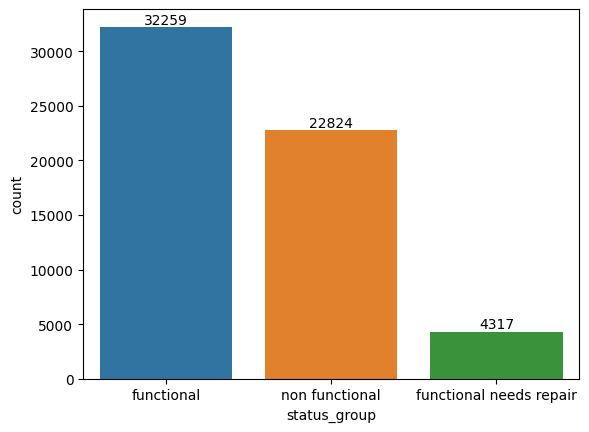

In [7]:
ax = sns.countplot(data=training_df, x='status_group')
ax.bar_label(ax.containers[0])
plt.show()

#### 2.22 Feature visualization

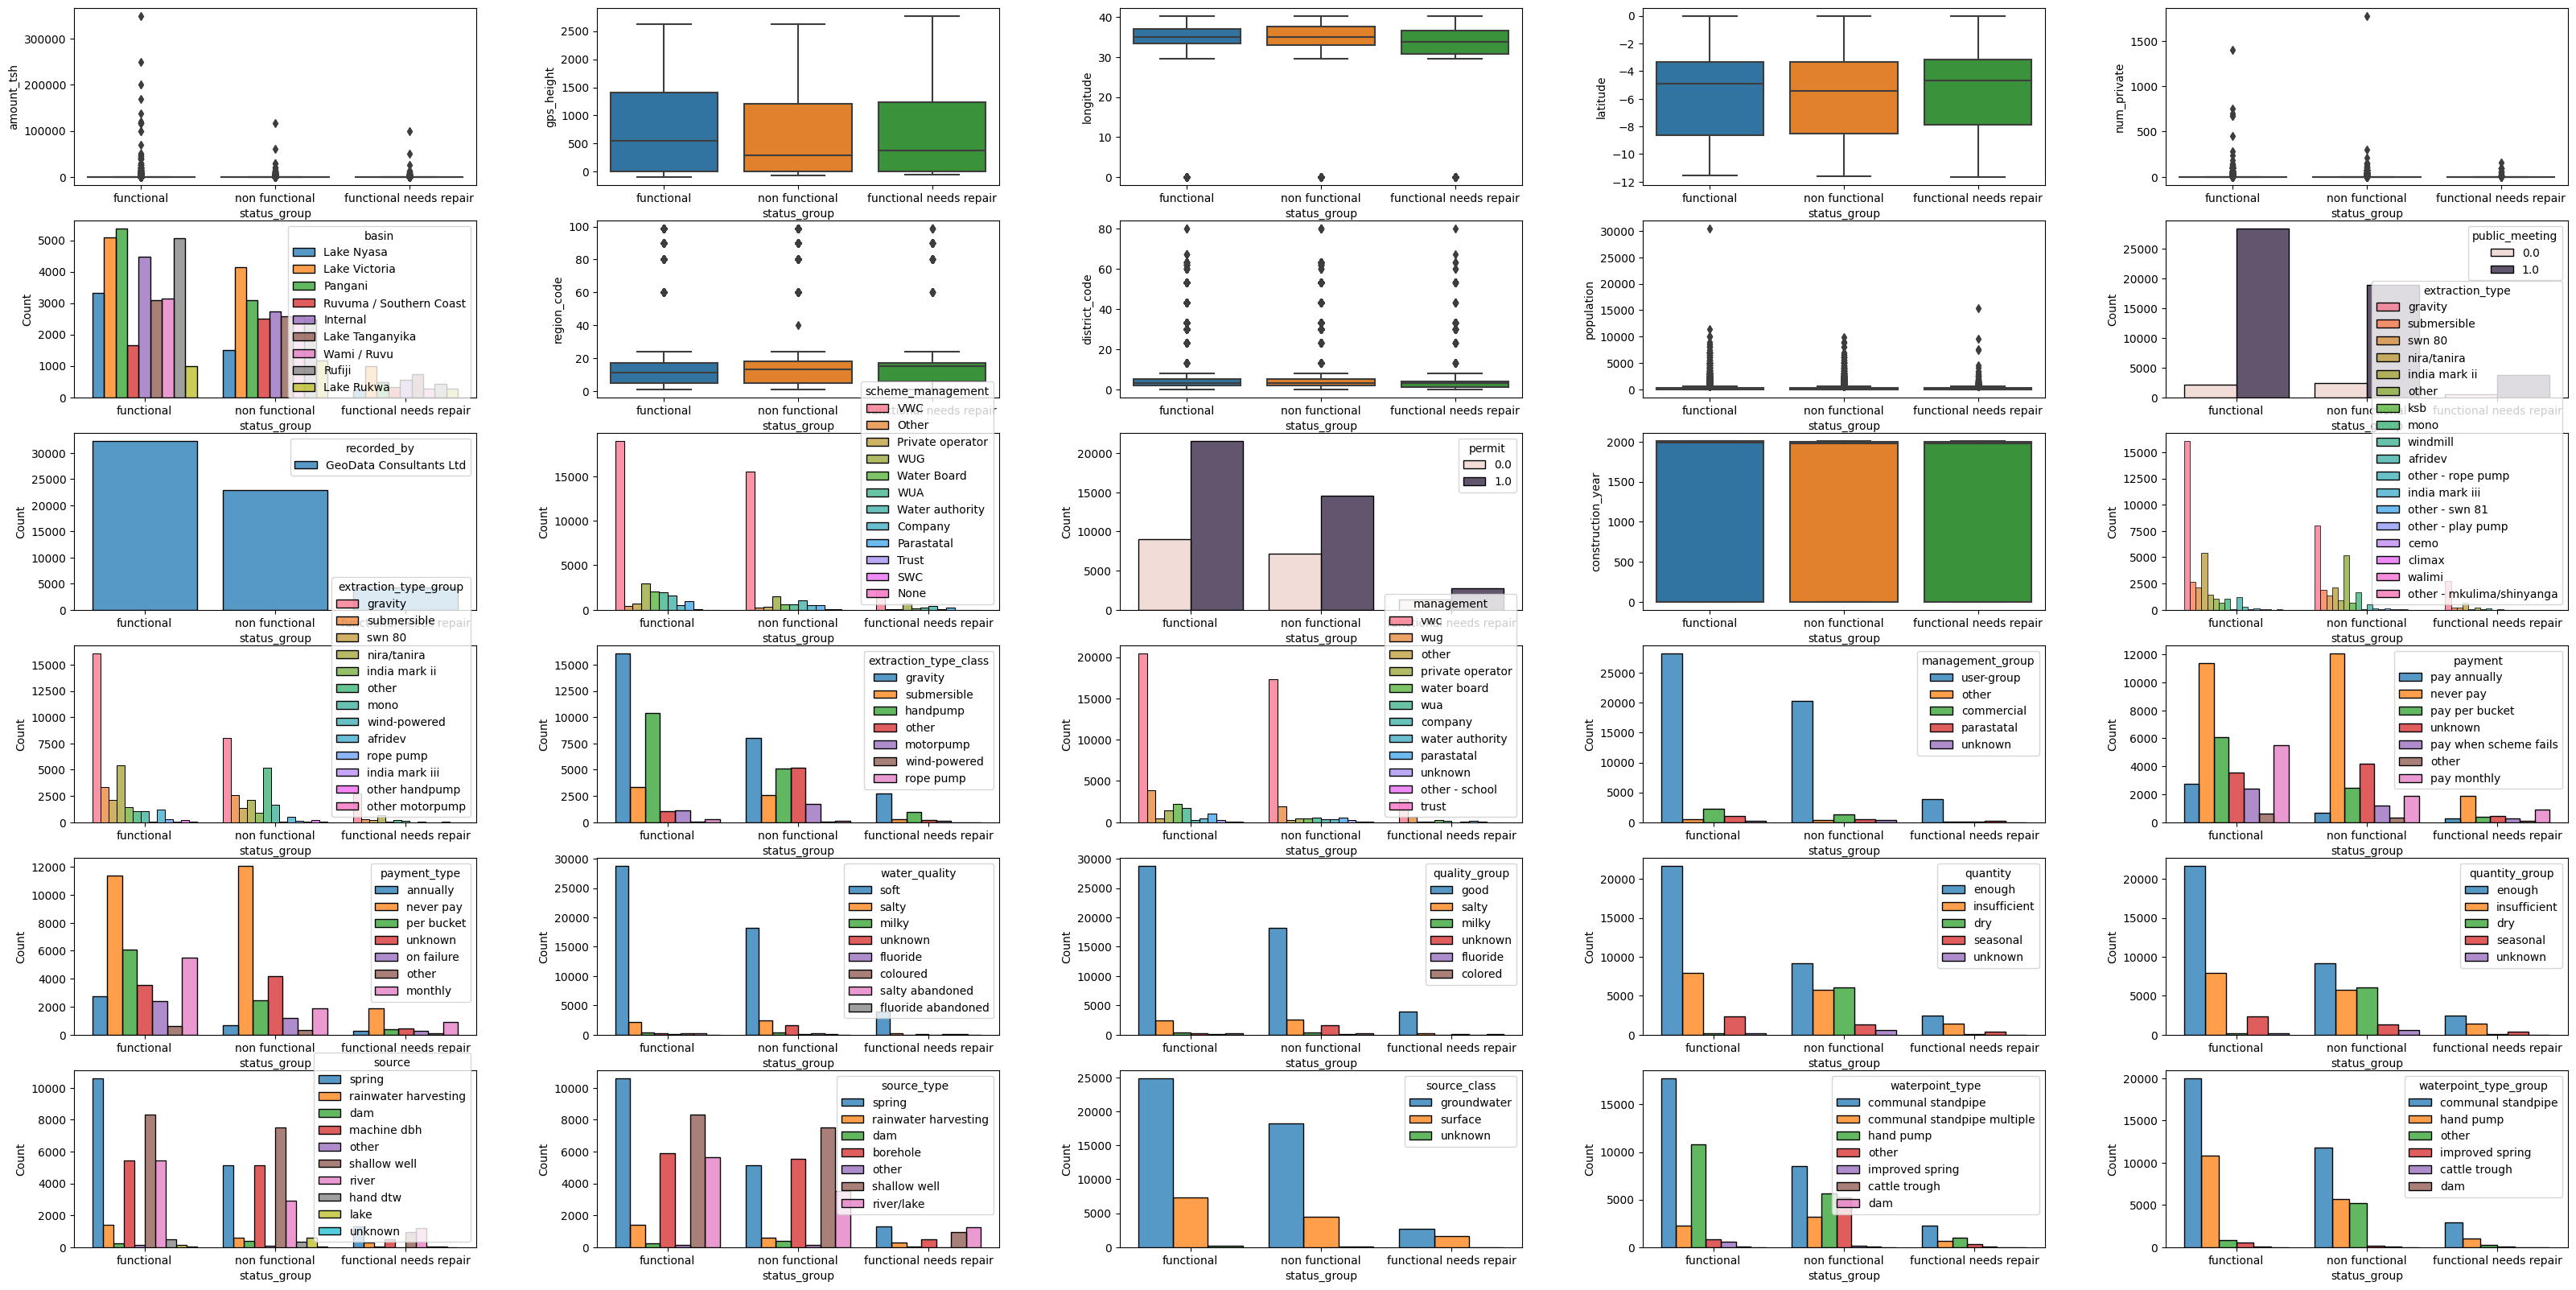

In [8]:
figure, axes = plt.subplots(nrows=6, ncols=5, figsize=(40, 20))
figure.subplots_adjust(hspace=.2, wspace=.3)
axes = axes.ravel()
axes_counter = 0

for col in training_df.columns[1:40]:
    if training_df[col].dtypes == "float64" or training_df[col].dtypes == "int64":
        sns.boxplot(data=training_df, y=training_df[col], x=training_df['status_group'], ax=axes[axes_counter])
        plt.xlabel = 'status_group'
        axes_counter += 1
    elif training_df[col].dtypes == object:
        # Only visualize categorical values that have less than 20 unique values
        if training_df[col].nunique() < 20:
            sns.histplot(data=training_df, x='status_group', hue=col, multiple='dodge', shrink=0.8,
                         ax=axes[axes_counter])
            plt.xlabel = 'status_group'
            axes_counter += 1

plt.savefig("pump it up visualization.png")

#### 2.3 Feature analysis

##### 2.31 id

In [9]:
print(training_df['id'].describe(), "\n")
print("Number of unique values for id:", training_df['id'].nunique())

count    59400.000000
mean     37115.131768
std      21453.128371
min          0.000000
25%      18519.750000
50%      37061.500000
75%      55656.500000
max      74247.000000
Name: id, dtype: float64 

Number of unique values for id: 59400


#### Notes:
- can convert float to int
- no duplicate id
- id index are not from 1 to 59400 but from 1 up to 74247 instead

##### 2.32 amount_tsh

In [10]:
print(training_df['amount_tsh'].describe(), "\n")
print(training_df['amount_tsh'].value_counts().sort_index().to_string())

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64 

0.00         41639
0.20             3
0.25             1
1.00             3
2.00            13
5.00           376
6.00           190
7.00            69
9.00             1
10.00          806
12.00            1
15.00           15
20.00         1463
25.00          356
26.00            1
30.00          743
33.00           20
35.00            8
40.00           59
50.00         2472
53.00            1
59.00            1
60.00           15
70.00           23
100.00         816
150.00          21
200.00        1220
220.00           1
250.00         569
300.00         557
306.00           1
350.00           3
400.00          42
450.00          42
500.00        3102
520.00           2
550.00           3
590.00           2
600.00         176
700.00          24
750.00          59
80

#### Notes:
- lots of extreme outlier values as most data points have the value of 0 and the outliers are 5 digits and above
- 0 values has the highest occurrence, might indicate null values
- only a couple of values have decimal points which are around 0.2
- the type of data could be converted to int if the data with decimals are wrong, not to mention every other data has no decimal points
- need to deal with extreme outliers to see the actual boxplot distribution

##### 2.33 date_recorded

In [11]:
print(training_df['date_recorded'].describe(), "\n")
print(training_df['date_recorded'].value_counts(ascending=False).head(30))

count          59400
unique           356
top       2011-03-15
freq             572
Name: date_recorded, dtype: object 

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
2011-03-18    497
2011-03-19    466
2013-02-04    464
2013-01-29    459
2011-03-04    458
2013-02-14    444
2013-01-24    435
2011-03-05    434
2013-02-15    429
2013-03-15    428
2011-03-11    426
2013-01-30    421
2013-02-16    418
2011-03-23    417
2011-03-09    416
2013-01-18    409
2013-02-26    391
2011-03-30    391
2011-03-24    381
2013-03-19    381
2013-02-13    380
2013-01-23    379
2011-03-12    379
2011-03-03    378
2013-01-28    376
Name: date_recorded, dtype: int64


### Notes:
- Most of them are recorded in 2011 and 2013

##### 2.34 funder

In [12]:
print(training_df['funder'].describe(), "\n")
print(training_df['funder'].value_counts().sort_index().to_string(), "\n")
print("Number of null values for funder:", training_df['funder'].isnull().sum())

count                      55765
unique                      1897
top       Government Of Tanzania
freq                        9084
Name: funder, dtype: object 

0                                  777
A/co Germany                        15
Aar                                 33
Abas Ka                              1
Abasia                              43
Abc-ihushi Development Cent          1
Abd                                  7
Abdala                               1
Abddwe                               1
Abdul                                1
Abood                                2
Abs                                  1
Aco/germany                         13
Acord                                3
Acord Ngo                            2
Acra                                46
Act                                  1
Act Mara                             1
Action Aid                           8
Action Contre La Faim                9
Action In A                          1
Adap               

### Notes:
- 777 '0' and 2 'None' values can be replaced with NaN plus 3635 null values
- there are a lots of very closely similar names, very likely mistyped names
- 1897 unique values, could also indicate how many mistakes
- Likely to be dropped

##### 2.35 gps_height

In [13]:
print(training_df['gps_height'].describe(), "\n")
print(training_df['gps_height'].value_counts().sort_index().to_string())

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64 

-90          1
-63          2
-59          1
-57          1
-55          1
-54          1
-53          1
-52          2
-51          2
-50          5
-49          4
-48          6
-47          8
-46          6
-45          9
-44          6
-43         11
-42         13
-41         11
-40         26
-39         14
-38         17
-37         19
-36         24
-35         18
-34         18
-33         22
-32         24
-31         26
-30         26
-29         26
-28         36
-27         42
-26         24
-25         34
-24         33
-23         45
-22         38
-21         40
-20         52
-19         47
-18         49
-17         44
-16         55
-15         60
-14         51
-13         55
-12         36
-11         41
-10         28
-9          38
-8          44
-7       

### Notes:
- Need to be converted to int data type
- Negative depth indicates inconsistent data
- Depth of 0 might be due to missing data

##### 2.36 installer

In [14]:
print(training_df['installer'].describe(), "\n")
print("Number of null values for installer: ", training_df['installer'].isnull().sum(), "\n")
print(training_df['installer'].value_counts().sort_index().to_string())

count     55745
unique     2145
top         DWE
freq      17402
Name: installer, dtype: object 

Number of null values for installer:  3655 

-                                     3
0                                   777
A.D.B                                 1
AAR                                   4
ABASIA                               29
ABD                                   1
ABDALA                                1
ABDUL                                 1
AC                                    2
ACORD                                 3
ACRA                                278
ACT                                   1
ACT MARA                              1
ACTION AID                            1
ACTIVE TANK CO                        9
ACTIVE TANK CO LTD                    2
AD                                   14
ADAP                                  4
ADB                                   5
ADP                                  19
ADP Busangi                          14
ADRA              

### Notes:
- 3 '-' and 777 '0' values plus several values like 'Not known' could be replaced with NaN
- have many misspelled names like the 'funder' column
- likely to be dropped

##### 2.37 longitude

In [15]:
print(training_df['longitude'].describe(), "\n")
print(training_df['longitude'].value_counts().sort_index())

count    59400.000000
mean        34.077427
std          6.567432
min          0.000000
25%         33.090347
50%         34.908743
75%         37.178387
max         40.345193
Name: longitude, dtype: float64 

0.000000     1812
29.607122       1
29.607201       1
29.610321       1
29.610965       1
             ... 
40.323402       1
40.325226       1
40.325240       1
40.344301       1
40.345193       1
Name: longitude, Length: 57516, dtype: int64


### Notes:
- 1812 '0' values which could indicate missing value
- imputation is required

##### 2.38 latitude

In [16]:
print(training_df['latitude'].describe(), "\n")
print(training_df['latitude'].value_counts(ascending=False))

count    5.940000e+04
mean    -5.706033e+00
std      2.946019e+00
min     -1.164944e+01
25%     -8.540621e+00
50%     -5.021597e+00
75%     -3.326156e+00
max     -2.000000e-08
Name: latitude, dtype: float64 

-2.000000e-08    1812
-6.985842e+00       2
-6.980220e+00       2
-2.476680e+00       2
-6.978263e+00       2
                 ... 
-3.287619e+00       1
-8.234989e+00       1
-3.268579e+00       1
-1.146053e+01       1
-6.747464e+00       1
Name: latitude, Length: 57517, dtype: int64


### Notes:
- 1812 wells with the exact same latitude -2.000000e-08

##### 2.39 wpt_name

In [17]:
# Name of the water point
print(training_df['wpt_name'].describe(), "\n")
print(training_df['wpt_name'].value_counts().sort_values())

count     59400
unique    37400
top        none
freq       3563
Name: wpt_name, dtype: object 

Namakambale Primary School       1
Nakisaya Kitwe                   1
Kwa Makausa Xavier               1
Kwa Pelo                         1
Shule Ya Msingi Kidoma           1
                              ... 
Kanisani                       323
Msikitini                      535
Zahanati                       830
Shuleni                       1748
none                          3563
Name: wpt_name, Length: 37400, dtype: int64


### Notes:
- 3563 'none' values and a couple of 'not known' values
- likely to be dropped

##### 2.40 num_private

In [18]:
print(training_df['num_private'].describe(), "\n")
print(training_df['num_private'].value_counts().sort_index().to_string())

count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64 

0       58643
1          73
2          23
3          27
4          20
5          46
6          81
7          26
8          46
9           4
10          4
11         11
12          5
14          3
15         35
16          8
17         17
20         14
22          6
23          1
24          5
25         12
26          2
27          2
30          1
32         40
34         10
35          1
38          4
39         30
41         10
42          1
45         36
47         21
50          5
55          1
58          4
60          1
61          3
62          1
65         22
80         15
87          1
93         28
94          1
102        20
111         1
120         7
131         1
136         1
141         1
150         6
160         1
180         1
213         1
240         1
280 

### Notes:
- Data type should be converted to int
- 58643 missing values can be replaced with NaN

##### 2.41 basin

In [19]:
print(training_df['basin'].describe(), "\n")
print(training_df['basin'].value_counts().to_string())

count             59400
unique                9
top       Lake Victoria
freq              10248
Name: basin, dtype: object 

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454


### Notes:
- Need to perform label encoding

##### 2.42 subvillage

In [20]:
print(training_df['subvillage'].describe(), "\n")
print(training_df['subvillage'].value_counts().sort_index().to_string())

count        59029
unique       19287
top       Madukani
freq           508
Name: subvillage, dtype: object 

##                                  1
'A' Kati                            1
1                                 132
14Kambalage                         5
18                                  1
19                                  3
20                                  1
22B                                 1
23B                                 1
24                                  1
24B                                 1
30                                  1
42                                  1
43                                  1
44                                  3
45                                  1
47                                  1
48                                  1
49                                  1
52 A                                1
53 A                                2
53 B                                1
54                                  2
58 B            

### Notes:
- there are several invalid value that does not represent a subvillage such as the use of only numbers or symbols
- likely to be dropped

##### 2.43 region

In [21]:
print(training_df['region'].describe(), "\n")
print(training_df['region'].value_counts().sort_index())

count      59400
unique        21
top       Iringa
freq        5294
Name: region, dtype: object 

Arusha           3350
Dar es Salaam     805
Dodoma           2201
Iringa           5294
Kagera           3316
Kigoma           2816
Kilimanjaro      4379
Lindi            1546
Manyara          1583
Mara             1969
Mbeya            4639
Morogoro         4006
Mtwara           1730
Mwanza           3102
Pwani            2635
Rukwa            1808
Ruvuma           2640
Shinyanga        4982
Singida          2093
Tabora           1959
Tanga            2547
Name: region, dtype: int64


### Notes:
- need to perform label encoding

##### 2.44 region_code

In [22]:
print(training_df['region_code'].describe(), "\n")
print(training_df['region_code'].value_counts().sort_index())

count    59400.000000
mean        15.297003
std         17.587406
min          1.000000
25%          5.000000
50%         12.000000
75%         17.000000
max         99.000000
Name: region_code, dtype: float64 

1     2201
2     3024
3     4379
4     2513
5     4040
6     1609
7      805
8      300
9      390
10    2640
11    5300
12    4639
13    2093
14    1979
15    1808
16    2816
17    5011
18    3324
19    3047
20    1969
21    1583
24     326
40       1
60    1025
80    1238
90     917
99     423
Name: region_code, dtype: int64


### Notes:
- need to convert float to int

##### 2.45 district_code

In [23]:
print(training_df['district_code'].describe(), "\n")
print(training_df['district_code'].value_counts().sort_index())

count    59400.000000
mean         5.629747
std          9.633649
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         80.000000
Name: district_code, dtype: float64 

0        23
1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
13      391
23      293
30      995
33      874
43      505
53      745
60       63
62      109
63      195
67        6
80       12
Name: district_code, dtype: int64


### Notes:
- need to convert float to int
- 0 as district code looks invalid

##### 2.46 lga (geographic location)

In [24]:
print(training_df['lga'].describe(), "\n")
print(training_df['lga'].value_counts().sort_index().to_string())

count      59400
unique       125
top       Njombe
freq        2503
Name: lga, dtype: object 

Arusha Rural        1252
Arusha Urban          63
Babati               511
Bagamoyo             997
Bahi                 224
Bariadi             1177
Biharamulo           403
Bukoba Rural         487
Bukoba Urban          88
Bukombe              514
Bunda                438
Chamwino             347
Chato                236
Chunya               298
Dodoma Urban         358
Geita                488
Hai                  625
Hanang               274
Handeni              254
Igunga               338
Ilala                497
Ileje                231
Ilemela              142
Iramba               544
Iringa Rural         728
Kahama               836
Karagwe              771
Karatu               326
Kasulu              1047
Kibaha               269
Kibondo              874
Kigoma Rural         824
Kigoma Urban          71
Kilindi              161
Kilolo               349
Kilombero            959
Kilos

### Notes:
- need to perform label encoding

##### 2.47 ward (geographic location)

In [25]:
print(training_df['ward'].describe(), "\n")
print(training_df['ward'].value_counts().sort_index().to_string())

count     59400
unique     2092
top       Igosi
freq        307
Name: ward, dtype: object 

Aghondi                     12
Akheri                      45
Arash                       12
Arri                        19
Arusha Chini                57
Babayu                      10
Badi                        34
Badugu                      17
Bahi                        17
Balangidalalu               19
Baleni                      22
Bangata                     33
Bangwe                       9
Baraa                        2
Bargish                     18
Bariadi                     13
Barikiwa                    11
Barray                      24
Bashay                      25
Bashinet                    19
Bassodesh                    4
Bassotu                      9
Bendera                     34
Berega                      35
Berege                      10
Bereko                      18
Bigwa                       13
Biharamulo Urban            63
Biirabo                     24
Binagi   

### Notes:
- need to perform label encoding
- likely to be dropped

##### 2.47 population

In [26]:
print(training_df['population'].describe(), "\n")
print(training_df['population'].value_counts().sort_values(ascending=False).to_string())

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64 

0        21381
1         7025
200       1940
150       1892
250       1681
300       1476
100       1146
50        1139
500       1009
350        986
120        916
400        775
60         706
30         626
40         552
80         533
450        499
20         462
600        438
230        388
75         289
1000       278
800        269
90         265
130        264
25         255
320        249
35         245
360        222
140        215
70         209
210        209
45         205
15         193
700        192
1500       190
180        183
650        177
65         175
1200       168
10         163
420        162
240        154
750        153
56         150
2000       130
160        127
260        125
55         116
125        113
96         112
540        110
560      

### Notes:
- need to convert float to int
- 21381 of '0' population value
- need to deal with the 0 values in order to see the proper box plot

##### 2.48 public_meeting

In [27]:
print(training_df['public_meeting'].describe(), "\n")
print(training_df['public_meeting'].value_counts().to_string())
print("The number of null values for public meeting:", training_df['public_meeting'].isnull().sum())

count     56066
unique        2
top        True
freq      51011
Name: public_meeting, dtype: object 

True     51011
False     5055
The number of null values for public meeting: 3334


### Notes:
- need to perform label encoding
- deal with 3334 missing values
- doesn't really impact the water status group as most of the values are 'True'
- likely to be dropped

##### 2.49 recorded_by

In [28]:
print(training_df['recorded_by'].describe(), "\n")

count                       59400
unique                          1
top       GeoData Consultants Ltd
freq                        59400
Name: recorded_by, dtype: object 



### Notes:
- will be dropped as it contributes nothing to the status_group, it's purely a column for record purpose

##### 2.50 scheme_management

In [29]:
print(training_df['scheme_management'].describe(), "\n")
print(training_df['scheme_management'].value_counts().to_string())
print("The number of null values for scheme_management is:", training_df['scheme_management'].isnull().sum())

count     55523
unique       12
top         VWC
freq      36793
Name: scheme_management, dtype: object 

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
The number of null values for scheme_management is: 3877


### Notes:
- A single 'None' value could be imputed
- Need to perform label encoding
- Need to impute 3877 null values

##### 2.51 scheme_name

In [30]:
print(training_df['scheme_name'].describe(), "\n")
print(training_df['scheme_name'].value_counts().sort_index().to_string())
print("The number of null values for scheme_name is:", training_df['scheme_name'].isnull().sum())

count     31234
unique     2696
top           K
freq        682
Name: scheme_name, dtype: object 

14 Kambarage                                        7
A                                                  42
ADP                                                 9
ADP Simbo                                          25
ADP Simbu                                           1
ADRA                                                8
AIC                                                 1
AIC kahunda                                         1
AMREF                                               3
AMRSF                                               1
AUWASA Pipe scheme                                  4
AUWASA pipe scheme                                  6
Adra                                                1
African Barrick Gold                                1
Akheri gravity water supply                        13
Alpha crust                                         2
Amani Water Supply                   

### Notes:
- too many null values (28166)
- lots of very similar names and very likely misspelled names
- likely to be dropped

##### 2.52 permit

In [31]:
print(training_df['permit'].describe(), "\n")
print(training_df['permit'].value_counts().sort_index().to_string())
print("The number of null values for permit is:", training_df['permit'].isnull().sum())

count     56344
unique        2
top        True
freq      38852
Name: permit, dtype: object 

False    17492
True     38852
The number of null values for permit is: 3056


### Notes:
- 3056 missing values to be dealt with
- doesn't seem to impact the status_group as much as the permit is generally 'True' for each group
- likely to be dropped

##### 2.53 construction_year

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64 

0       20709
1960      102
1961       21
1962       30
1963       85
1964       40
1965       19
1966       17
1967       88
1968       77
1969       59
1970      411
1971      145
1972      708
1973      184
1974      676
1975      437
1976      414
1977      202
1978     1037
1979      192
1980      811
1981      238
1982      744
1983      488
1984      779
1985      945
1986      434
1987      302
1988      521
1989      316
1990      954
1991      324
1992      640
1993      608
1994      738
1995     1014
1996      811
1997      644
1998      966
1999      979
2000     2091
2001      540
2002     1075
2003     1286
2004     1123
2005     1011
2006     1471
2007     1587
2008     2613
2009     2533
2010     2645
2011     1256
2012     1084
2013      176


<AxesSubplot:xlabel='status_group', ylabel='Count'>

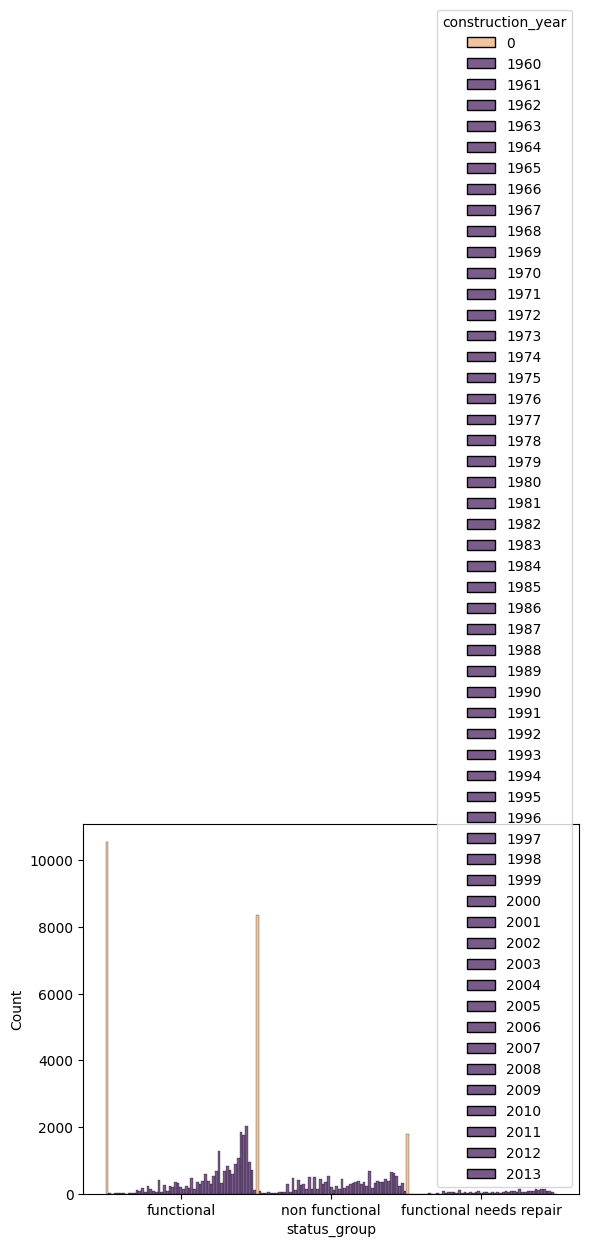

In [32]:
print(training_df['construction_year'].describe(), "\n")
print(training_df['construction_year'].value_counts().sort_index().to_string())

sns.histplot(data=training_df, x='status_group', hue='construction_year', multiple='dodge', palette='flare')

### Notes:
- 20709 missing values to be dealt with
- might drop this column if could not find a decent solution to replace the missing value
- seems like the more recent years its being constructed, more likely to be funcitonal

##### 2.54 extraction_type

In [33]:
print(training_df['extraction_type'].describe(), "\n")
print(training_df['extraction_type'].value_counts().sort_index().to_string())

count       59400
unique         18
top       gravity
freq        26780
Name: extraction_type, dtype: object 

afridev                       1770
cemo                            90
climax                          32
gravity                      26780
india mark ii                 2400
india mark iii                  98
ksb                           1415
mono                          2865
nira/tanira                   8154
other                         6430
other - mkulima/shinyanga        2
other - play pump               85
other - rope pump              451
other - swn 81                 229
submersible                   4764
swn 80                        3670
walimi                          48
windmill                       117


### Notes:
- Need to perform label encoding

##### 2.55 extraction_type_group

In [34]:
print(training_df['extraction_type_group'].describe(), "\n")
print(training_df['extraction_type_group'].value_counts().sort_index().to_string())

count       59400
unique         13
top       gravity
freq        26780
Name: extraction_type_group, dtype: object 

afridev             1770
gravity            26780
india mark ii       2400
india mark iii        98
mono                2865
nira/tanira         8154
other               6430
other handpump       364
other motorpump      122
rope pump            451
submersible         6179
swn 80              3670
wind-powered         117


### Notes:
- Need to perform label encoding
- cemo, climax, ksb, mkulima/shinyanga, play pump, walimi, swn 81 being grouped into other - hand pump and other - motor pump, submersible
- windmill -> wind-powered

##### 2.56 extraction_type_class

In [35]:
print(training_df['extraction_type_class'].describe(), "\n")
print(training_df['extraction_type_class'].value_counts().sort_index().to_string())

count       59400
unique          7
top       gravity
freq        26780
Name: extraction_type_class, dtype: object 

gravity         26780
handpump        16456
motorpump        2987
other            6430
rope pump         451
submersible      6179
wind-powered      117


### Notes:
- Need to perform label encoding

##### 2.57 management

In [36]:
print(training_df['management'].describe(), "\n")
print(training_df['management'].value_counts().sort_index().to_string())

count     59400
unique       12
top         vwc
freq      40507
Name: management, dtype: object 

company               685
other                 844
other - school         99
parastatal           1768
private operator     1971
trust                  78
unknown               561
vwc                 40507
water authority       904
water board          2933
wua                  2535
wug                  6515


### Notes:
- 561 'unknown' values to be dealt with
- Need to perform label encoding
- too much vwc data which might be not useful in predicting the output

##### 2.58 management_group

In [37]:
print(training_df['management_group'].describe(), "\n")
print(training_df['management_group'].value_counts().sort_index().to_string())

count          59400
unique             5
top       user-group
freq           52490
Name: management_group, dtype: object 

commercial     3638
other           943
parastatal     1768
unknown         561
user-group    52490


### Notes:
- 561 'unknown' values to be dealt with
- Need to perform label encoding
- too much user-group data which might be not useful in predicting the output
- does not seem to impact the status_group much as user_group is the highest count in each group

##### 2.59 payment

In [38]:
print(training_df['payment'].describe(), "\n")
print(training_df['payment'].value_counts().sort_index().to_string())

count         59400
unique            7
top       never pay
freq          25348
Name: payment, dtype: object 

never pay                25348
other                     1054
pay annually              3642
pay monthly               8300
pay per bucket            8985
pay when scheme fails     3914
unknown                   8157


### Notes:
- 8157 'unknown' values to be dealt with
- Need to perform label encoding

##### 2.60 payment_type

In [39]:
print(training_df['payment_type'].describe(), "\n")
print(training_df['payment_type'].value_counts().sort_index().to_string())

count         59400
unique            7
top       never pay
freq          25348
Name: payment_type, dtype: object 

annually       3642
monthly        8300
never pay     25348
on failure     3914
other          1054
per bucket     8985
unknown        8157


### Notes:
- it is a duplicate of 'payment' column as all index and value counts are the same
- need to remove either one of them

##### 2.61 water_quality

In [40]:
print(training_df['water_quality'].describe(), "\n")
print(training_df['water_quality'].value_counts().sort_index().to_string())

count     59400
unique        8
top        soft
freq      50818
Name: water_quality, dtype: object 

coloured                490
fluoride                200
fluoride abandoned       17
milky                   804
salty                  4856
salty abandoned         339
soft                  50818
unknown                1876


### Notes:
- too much 'soft' value which makes it imbalance to use this column to predict status_group
- for each group, 'soft' value dominates over any other quality in the histogram plot
- Need to perform label encoding

##### 2.62 quality_group

In [41]:
print(training_df['quality_group'].describe(), "\n")
print(training_df['quality_group'].value_counts().sort_index().to_string())

count     59400
unique        6
top        good
freq      50818
Name: quality_group, dtype: object 

colored       490
fluoride      217
good        50818
milky         804
salty        5195
unknown      1876


### Notes:
- essentially almost a duplicate of 'water_quality' column, it only combines fluoride and salt categories together
- Need to drop 'water_quality' column instead
- Need to perform label encoding

##### 2.63 quantity

In [42]:
print(training_df['quantity'].describe(), "\n")
print(training_df['quantity'].value_counts().sort_index().to_string())

count      59400
unique         5
top       enough
freq       33186
Name: quantity, dtype: object 

dry              6246
enough          33186
insufficient    15129
seasonal         4050
unknown           789


### Notes:
- 789 'unknown' values to be dealt with
- Need to perform label encoding

##### 2.64 quantity_group

In [43]:
print(training_df['quantity_group'].describe(), "\n")
print(training_df['quantity_group'].value_counts().sort_index().to_string())

count      59400
unique         5
top       enough
freq       33186
Name: quantity_group, dtype: object 

dry              6246
enough          33186
insufficient    15129
seasonal         4050
unknown           789


### Notes:
- it's a duplicate of 'quantity' column
- will be dropped

##### 2.65 source

In [44]:
print(training_df['source'].describe(), "\n")
print(training_df['source'].value_counts().sort_index().to_string())

count      59400
unique        10
top       spring
freq       17021
Name: source, dtype: object 

dam                       656
hand dtw                  874
lake                      765
machine dbh             11075
other                     212
rainwater harvesting     2295
river                    9612
shallow well            16824
spring                  17021
unknown                    66


### Notes:
- 66 'unknown' values to be dealt with
- Need to perform label encoding

##### 2.66 source_type

In [45]:
print(training_df['source_type'].describe(), "\n")
print(training_df['source_type'].value_counts().sort_index().to_string())

count      59400
unique         7
top       spring
freq       17021
Name: source_type, dtype: object 

borehole                11949
dam                       656
other                     278
rainwater harvesting     2295
river/lake              10377
shallow well            16824
spring                  17021


### Notes:
- Need to perform label encoding
- 'unknown' is added into the 'other' categories
- does not seem to impact the 'status_group' as each status group have a similar histogram plot except the sizes

##### 2.67 source_class

In [46]:
print(training_df['source_class'].describe(), "\n")
print(training_df['source_class'].value_counts().sort_index().to_string())

count           59400
unique              3
top       groundwater
freq            45794
Name: source_class, dtype: object 

groundwater    45794
surface        13328
unknown          278


### Notes:
- It further combines 'source_type' columns into only 3 categories
- too much 'groundwater' value which won't be useful in predicting 'status_group'
- this column does not seem useful as 'groundwater' dominates other categories in each group and the histogram plot for each group looks the same except the size
- likely to be dropped

##### 2.68 waterpoint_type

In [47]:
print(training_df['waterpoint_type'].describe(), "\n")
print(training_df['waterpoint_type'].value_counts().sort_index().to_string())

count                  59400
unique                     7
top       communal standpipe
freq                   28522
Name: waterpoint_type, dtype: object 

cattle trough                    116
communal standpipe             28522
communal standpipe multiple     6103
dam                                7
hand pump                      17488
improved spring                  784
other                           6380


### Notes:
- Need to perform label encoding

##### 2.69 waterpoint_type_group

In [48]:
print(training_df['waterpoint_type_group'].describe(), "\n")
print(training_df['waterpoint_type_group'].value_counts().sort_index().to_string())

count                  59400
unique                     6
top       communal standpipe
freq                   34625
Name: waterpoint_type_group, dtype: object 

cattle trough           116
communal standpipe    34625
dam                       7
hand pump             17488
improved spring         784
other                  6380


### Notes:
- Need to perform label encoding
- Combines all comunal categories into one
- Needs to drop either 'waterpoint_type_group' or 'waterpoint_type' column